<div style="text-align:left"><span style="color:black; font-family:Georgia; font-size:1.5em;"><b>Experiements and testing implementations (Part 3) <center> (Kernelized version)</center></span></div> <br>
<br>
    
<div style="text-align:center"><span style="color:black; font-family:Georgia; font-size:1.2em;"><b>Robin Khatri &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; &nbsp;&nbsp;Mohammed Poul Doust</b></span></div>

## Kernelized Online Passive-Aggressive Algorithms

In [1]:
# Our implementations
from paKernel import KPA # Kernelized version of PA
from pa import PA # Passive-aggressive
from utils import test_on_data # Function to test multiple classifiers
from utils import get_accuracy # Simple function to compute accuracy

# Python imports
from sklearn import datasets
import numpy as np
from prediction_wrapper import get_accuracy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import time
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a make moons dataset and scale the labels to +1 and -1 to work with our online learning algorithm
n_samples = 1000
X, y = datasets.make_moons(n_samples = n_samples, noise = 0.5)
y = np.array(2*y - 1, dtype='int')

In [3]:
print(y[0:5])

[ 1  1 -1  1  1]


In [4]:
kpa_classic = KPA(C = 0.1, update_ = 'classic', kernel = 'rbf', gamma = 0.5)
kpa_fr = KPA(C = 0.1, update_ = 'fr', kernel = 'rbf', gamma = 0.5)
kpa_sr = KPA(C = 0.1, update_ = 'sr', kernel = 'rbf', gamma = 0.5)
svm = SVC(kernel = 'rbf', gamma = 0.5)

In [5]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
start = time.time()
kpa_classic.fit(X_train,y_train) # Classic update
print(time.time()-start)
start = time.time()
kpa_fr.fit(X_train,y_train) # First relaxation
print(time.time()-start)
start = time.time()
kpa_sr.fit(X_train,y_train) # Second relaxation
print(time.time()-start)
start = time.time()
svm.fit(X_train,y_train)
print(time.time()-start)

0.24766063690185547
0.22258448600769043
0.22449159622192383
0.009786367416381836


In [10]:
y_pred_classic = kpa_classic.predict_all(X_test)

y_pred_fr = kpa_fr.predict_all(X_test)

y_pred_sr = kpa_sr.predict_all(X_test)

y_pred_svm = svm.predict(X_test)

In [8]:
# Accuracy with PA sr update
get_accuracy(y_pred_sr,y_test)

Accuracy is: 85.0


85.0

In [11]:
# Accuracy with PA classic update
get_accuracy(y_pred_classic,y_test)

Accuracy is: 80.0


80.0

In [12]:
# Accuracy with PA first relaxation update
get_accuracy(y_pred_fr,y_test)

Accuracy is: 85.0


85.0

In [13]:
# Accuracy with SVM
get_accuracy(y_pred_svm,y_test)

Accuracy is: 84.5


84.5

### Visualize decision boundaries for Kernelized PA (gamma=0.5, C=0.1, update = first relaxation) and SVM with rbf kernel (gamma=0.5)

Text(0.5, 1.0, 'Online PA, RBF Kernel, Accuracy=0.850000, Time-taken0.080000')

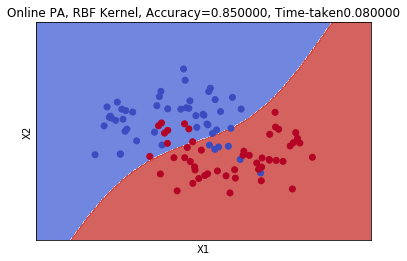

In [12]:
n_samples = 100
X, y = datasets.make_moons(n_samples = n_samples, noise = 0.3)
y = np.array(2*y - 1, dtype='int')

h = 0.02 # Mesh step size

# Meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))

kernel = 'rbf'

start_ = time.time()
clf = KPA(C = 0.1, update_='fr',kernel = kernel, gamma = 0.5)
clf.fit(X,y)

test_size = X.shape[0]
y_pred = clf.predict_all(X)
time_taken = time.time()-start_
acc = (y_pred==y).mean()

test_X = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict_all(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Online PA, RBF Kernel, Accuracy=%f, Time-taken%f'%(round(acc,2),round(time_taken,2)))

Text(0.5, 1.0, 'SVM, RBF Kernel, Accuracy=0.870000, Time-taken0.000000')

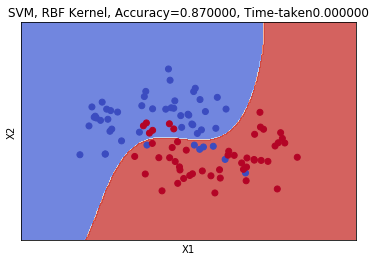

In [13]:
start_ = time.time()
clf = SVC(kernel = kernel, gamma = 0.5)
clf.fit(X,y)

test_size = X.shape[0]
y_pred = clf.predict(X)
time_taken = time.time()-start_
acc = (y_pred==y).mean()

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM, RBF Kernel, Accuracy=%f, Time-taken%f'%(round(acc,2),round(time_taken,2)))

### Visualize decision boundaries for Kernelized PA with polynomial Kernel (degree=3, C=0.1, update = first relaxation)

Text(0.5, 1.0, 'SVM, RBF Kernel, Accuracy=0.840000, Time-taken0.060000')

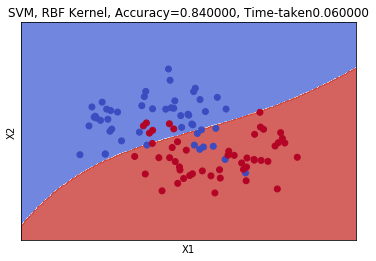

In [14]:
kernel = 'poly'
start_ = time.time()
clf = KPA(C = 0.1, update_= 'fr',kernel= kernel, degree= 3)
clf.fit(X,y)

test_size = X.shape[0]
y_pred = clf.predict_all(X)
time_taken = time.time()-start_
acc = (y_pred==y).mean()

Z = clf.predict_all(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM, RBF Kernel, Accuracy=%f, Time-taken%f'%(round(acc,2),round(time_taken,2)))

### Effect of C

In [30]:
# Test accuracy with changing C (Make_Moons dataset)
temp = list(range(1,21))
C = [round(x*0.05,2) for x in temp]
print('C:',C)
Accuracy = np.zeros((len(C),2))
a = 0
n_samples = 1000
for i in range(len(C)):
    c = C[i]
    X, y = datasets.make_moons(n_samples = n_samples, noise = 0.1)
    y = np.array(2*y - 1, dtype='int')
    kpa = KPA(C=c,update_='fr')
   
    kpa.fit(X,y)
    y_pred = kpa.predict_all(X)
    Accuracy[a,0] = (y_pred==y).mean()*100

    a += 1 

C: [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [31]:
Accuracy[:,0].T

array([94.1, 97. , 97.4, 98.7, 99.4, 99. , 98.7, 98.8, 99.5, 99.4, 99.8,
       99.4, 99.6, 99.6, 99.7, 99. , 99.6, 97.3, 99.9, 99.7])

Text(0.5, 1.0, 'Accuracy v. C')

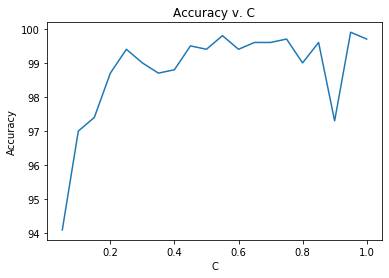

In [32]:
plt.plot(C,Accuracy[:,0])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy v. C')

### Time Complexity

In [16]:
sample_sizes = [50,100,150,200,300,400,600,1000,2000,10000]
time_taken = np.zeros((len(sample_sizes),2)) # 3 classifiers - 1 for each update
a = 0
for i in range(len(sample_sizes)):
    n_samples = sample_sizes[i]
    X, y = datasets.make_moons(n_samples = n_samples, noise = 0.5)
    y = np.array(2*y - 1, dtype='int')
    kpa_classic = KPA(update_='classic')
    kpa_fr = KPA(update_='fr')
    
    s = time.time()
    kpa_classic.fit(X,y)
    time_taken[a,0] = round(time.time() - s,2)
    
    s = time.time()
    kpa_fr.fit(X,y)
    time_taken[a,1] = round(time.time() - s,2)
    
    a += 1

In [17]:
print('classic','fr')
print(time_taken)

classic fr
[[0.02 0.02]
 [0.03 0.03]
 [0.04 0.04]
 [0.05 0.05]
 [0.07 0.08]
 [0.11 0.11]
 [0.19 0.15]
 [0.26 0.27]
 [0.53 0.52]
 [4.11 3.88]]


Text(0.5, 1.0, 'train time-complexity for classic update')

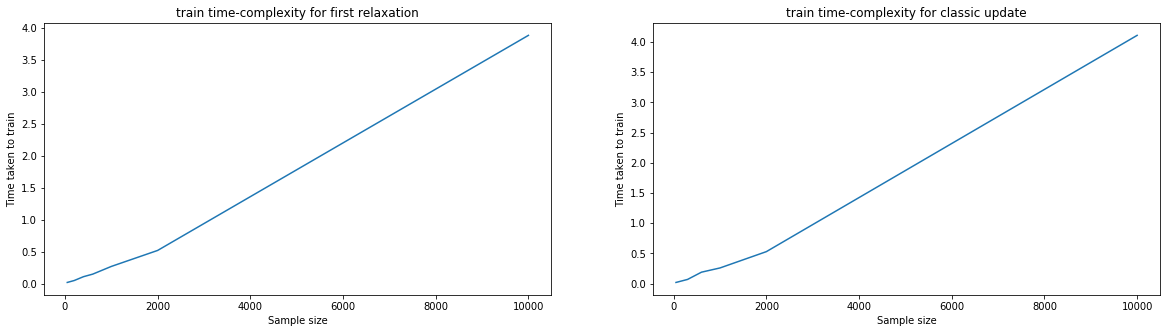

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,2, 1)
plt.plot(sample_sizes,time_taken[:,1])
plt.xlabel('Sample size')
plt.ylabel('Time taken to train')
plt.title('train time-complexity for first relaxation')

plt.subplot(1,2,2)
plt.plot(sample_sizes,time_taken[:,0])
plt.xlabel('Sample size')
plt.ylabel('Time taken to train')
plt.title('train time-complexity for classic update')

In [21]:
sample_sizes = [50,100,150,200,300,400,600,1000,2000,10000]
time_taken = np.zeros((len(sample_sizes),2)) # 2 classifiers - 1 for each update
a = 0
for i in range(len(sample_sizes)):
    n_samples = sample_sizes[i]
    X, y = datasets.make_moons(n_samples = n_samples, noise = 0.5)
    y = np.array(2*y - 1, dtype='int')
    kpa_classic = KPA(update_='classic')
    kpa_fr = KPA(update_='fr')
    
    
    kpa_classic.fit(X,y)
    kpa_fr.fit(X,y)
    s = time.time()
    y_pred = kpa_classic.predict_all(X)
    time_taken[a,0] = round(time.time() - s,2)
    
    s = time.time()
    y_pred = kpa_fr.predict_all(X)
    time_taken[a,1] = round(time.time() - s,2)
    
    a += 1

Text(0.5, 1.0, 'test time-complexity for classic update')

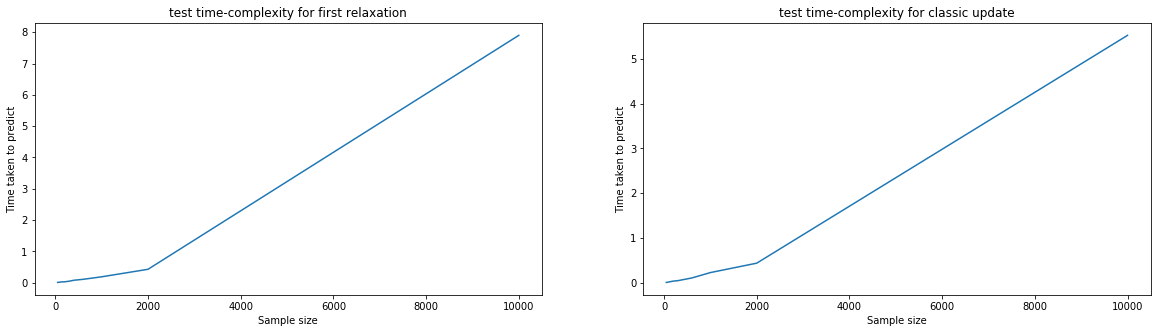

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(1,2, 1)
plt.plot(sample_sizes,time_taken[:,1])
plt.xlabel('Sample size')
plt.ylabel('Time taken to predict')
plt.title('test time-complexity for first relaxation')

plt.subplot(1,2,2)
plt.plot(sample_sizes,time_taken[:,0])
plt.xlabel('Sample size')
plt.ylabel('Time taken to predict')
plt.title('test time-complexity for classic update')

### On datasets from LIBSVM Webpage

**Ionosphere dataset**

In [20]:
iono = pd.read_csv("ionosphere.csv",sep=',',header=None)

In [21]:
iono.shape

(351, 35)

In [22]:
iono.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [23]:
iono.iloc[:,-1] = LabelBinarizer(neg_label=-1,pos_label=1).fit_transform(iono.iloc[:,-1])

In [24]:
iono = np.array(iono)
X,y = iono[:,0:(iono.shape[1]-2)], np.array(iono[:,-1],dtype='int')

In [25]:
clf = KPA(C=0.5,kernel='rbf',gamma=0.5)
clf.fit(X,y)
get_accuracy(clf.predict_all(X),y)

Accuracy is: 97.43589743589743


97.43589743589743

In [26]:
classifiers = {'SVM': SVC(kernel='rbf',gamma=0.5), 
               'PA (First relaxation)': PA(C=0.5,update_='fr'), 
               'KPA rbf kernel': KPA(C=0.5,kernel='rbf',gamma=0.5),
              'KPA polynomial kernel': KPA(C=0.5,kernel='poly',degree=3)}
test_on_data(X,y,classifiers)

'SVM'( time taken:  0.01334238052368164 , accuracy:   97.17 %)
'PA (First relaxation)'( time taken:  0.02760934829711914 , accuracy:   84.91 %)
'KPA rbf kernel'( time taken:  0.08585405349731445 , accuracy:   91.51 %)
'KPA polynomial kernel'( time taken:  0.041235923767089844 , accuracy:   89.62 %)


**With kernels, accuracy is clearly better.**